In [1]:
import numpy as np 
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("../Sampled Dataset/Without Kmeans 50-50 Sampled.csv")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
0,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,-5.418204,-13.202577,...,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.498300,-0.711066,-0.305610,1
1,0.775570,-0.770648,0.936321,1.312951,-1.060369,0.343982,-0.509566,0.281372,0.823800,-0.081314,...,0.064923,-0.121614,-0.206049,-0.029554,0.318518,-0.420916,0.025195,0.054102,0.307804,0
2,-0.098257,0.277438,0.682605,0.541734,0.744008,0.239270,0.852291,-0.130182,0.684496,-0.425860,...,0.382471,1.551722,-0.164158,0.716621,-0.432961,-0.479633,0.110424,0.034605,-0.235720,0
3,-1.093755,0.557129,1.603202,0.008525,1.060342,0.071394,0.476971,0.216907,-0.400491,-0.607183,...,-0.046997,-0.050579,-0.460900,-0.290351,0.782954,-0.449391,-0.104006,-0.067875,-0.415446,0
4,-1.369120,1.099830,1.393934,-0.638975,-0.588518,0.260273,0.216639,0.545081,-0.049583,-0.726512,...,-0.043952,-0.411460,-0.199765,-0.463215,0.240325,-0.432551,-0.427597,-0.019662,-0.176961,0


In [3]:
normal_data = data.loc[data["Class"] == 0]
fraud_data = data.loc[data["Class"] == 1]
print("Size of normal_data:", len(normal_data))
print("Size of fraud_data:", len(fraud_data))
normal_data.head()

Size of normal_data: 492
Size of fraud_data: 492


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
1,0.775570,-0.770648,0.936321,1.312951,-1.060369,0.343982,-0.509566,0.281372,0.823800,-0.081314,...,0.064923,-0.121614,-0.206049,-0.029554,0.318518,-0.420916,0.025195,0.054102,0.307804,0
2,-0.098257,0.277438,0.682605,0.541734,0.744008,0.239270,0.852291,-0.130182,0.684496,-0.425860,...,0.382471,1.551722,-0.164158,0.716621,-0.432961,-0.479633,0.110424,0.034605,-0.235720,0
3,-1.093755,0.557129,1.603202,0.008525,1.060342,0.071394,0.476971,0.216907,-0.400491,-0.607183,...,-0.046997,-0.050579,-0.460900,-0.290351,0.782954,-0.449391,-0.104006,-0.067875,-0.415446,0
4,-1.369120,1.099830,1.393934,-0.638975,-0.588518,0.260273,0.216639,0.545081,-0.049583,-0.726512,...,-0.043952,-0.411460,-0.199765,-0.463215,0.240325,-0.432551,-0.427597,-0.019662,-0.176961,0
7,1.847503,0.296708,-2.257113,1.631420,0.762910,-1.139432,0.800692,-0.389792,0.060048,-0.405638,...,0.036619,0.136874,-0.019559,0.973050,0.408954,-0.554306,-0.014721,-0.003885,-0.086124,0


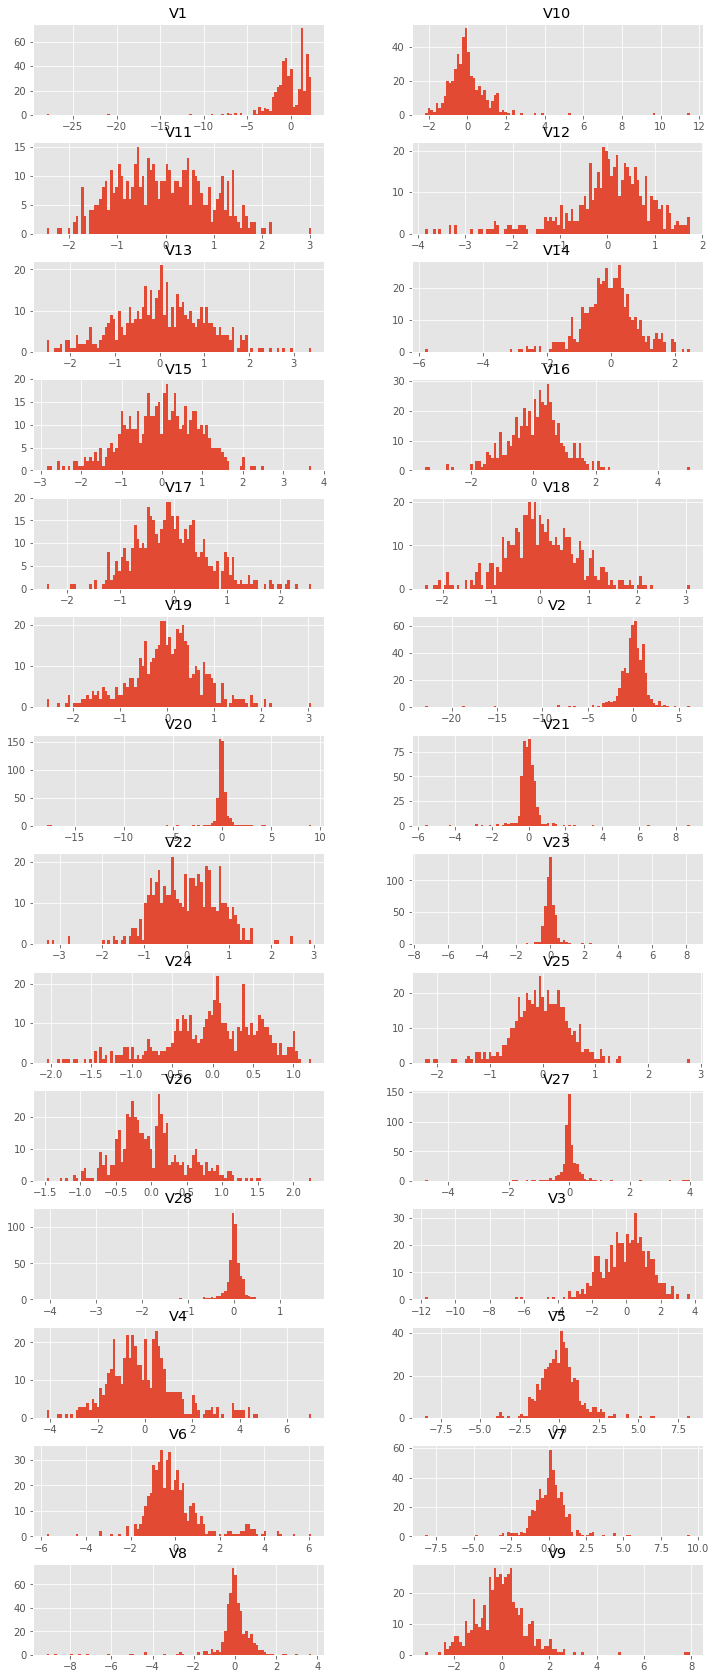

In [4]:
matplotlib.style.use('ggplot')
pca_columns = list(data)[0:-2]
normal_data[pca_columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

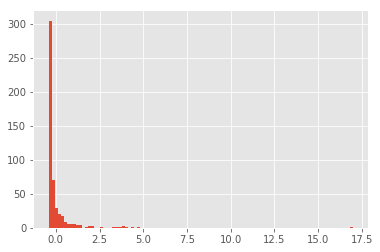

In [5]:
normal_data["normAmount"].loc[normal_data["normAmount"] < 500].hist(bins=100);

In [6]:
print("Mean", normal_data["normAmount"].mean())
print("Median", normal_data["normAmount"].median())

Mean -0.03878243004573163
Median -0.31051871245


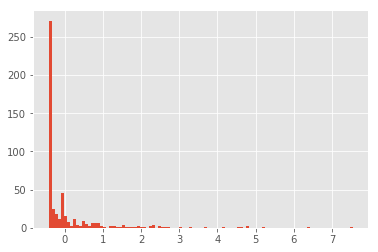

In [7]:
fraud_data["normAmount"].hist(bins=100);

In [8]:
print("Mean Fraudulent", fraud_data["normAmount"].mean())
print("Median Fraudulent", fraud_data["normAmount"].median())

Mean Fraudulent 0.038782430033536555
Median Fraudulent -0.3845300823500001


In [9]:
normal_pca_data = normal_data[pca_columns]
fraud_pca_data = fraud_data[pca_columns]
num_test = 65
shuffled_data = normal_pca_data.sample(frac=1)[:-num_test].values
normal_pca_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
1,0.775570,-0.770648,0.936321,1.312951,-1.060369,0.343982,-0.509566,0.281372,0.823800,-0.081314,...,0.152749,0.182625,0.064923,-0.121614,-0.206049,-0.029554,0.318518,-0.420916,0.025195,0.054102
2,-0.098257,0.277438,0.682605,0.541734,0.744008,0.239270,0.852291,-0.130182,0.684496,-0.425860,...,-0.327734,-0.062625,0.382471,1.551722,-0.164158,0.716621,-0.432961,-0.479633,0.110424,0.034605
3,-1.093755,0.557129,1.603202,0.008525,1.060342,0.071394,0.476971,0.216907,-0.400491,-0.607183,...,-0.799868,-0.294061,-0.046997,-0.050579,-0.460900,-0.290351,0.782954,-0.449391,-0.104006,-0.067875
4,-1.369120,1.099830,1.393934,-0.638975,-0.588518,0.260273,0.216639,0.545081,-0.049583,-0.726512,...,0.684397,-0.283601,-0.043952,-0.411460,-0.199765,-0.463215,0.240325,-0.432551,-0.427597,-0.019662
7,1.847503,0.296708,-2.257113,1.631420,0.762910,-1.139432,0.800692,-0.389792,0.060048,-0.405638,...,-0.596533,-0.059904,0.036619,0.136874,-0.019559,0.973050,0.408954,-0.554306,-0.014721,-0.003885


In [10]:
X_train = shuffled_data[:-2*num_test]

X_valid = np.concatenate([shuffled_data[-2*num_test:-num_test], fraud_pca_data[:246]])
y_valid = np.concatenate([np.zeros(num_test), np.ones(246)])

X_test = np.concatenate([shuffled_data[-num_test:], fraud_pca_data[246:]])
y_test = np.concatenate([np.zeros(num_test), np.ones(246)])

print("Size of X:",len(X_train),'   ', len(X_valid), '    ', len(X_test))
print("Size of Y:",len(y_valid), '    ', len(y_test))
print ("Size of normal_pca_data:", len(normal_pca_data))
print ("Size of fraud_pca_data:", len(fraud_pca_data))
print ("Size of fraud_data:", len(fraud_data))

Size of X: 297     311      311
Size of Y: 311      311
Size of normal_pca_data: 492
Size of fraud_pca_data: 492
Size of fraud_data: 492


In [11]:
X_Legit = data.query("Class==0").drop(["normAmount","Class"],1)
y_Legit = data.query("Class==0")["Class"]

X_Fraud = data.query("Class==1").drop(["normAmount","Class"],1)
y_Fraud = data.query("Class==1")["Class"]

print("Size of X_Legit ",len(X_Legit),'  ', "y_Legit: ", len(y_Legit))
print("Size of X_Fraud ",len(X_Fraud),'  ', "y_Fraud: ", len(y_Fraud))

Size of X_Legit  492    y_Legit:  492
Size of X_Fraud  492    y_Fraud:  492


In [12]:
def covariance_matrix(X):
    m=len(X)
    mu = X.mean()
    Sigma=0
    for i in range(m):
        Sigma += np.outer(X[i] - mu, X[i] - mu)
    return Sigma / m

In [13]:
cov_mat = covariance_matrix(X_train)
cov_mat_inv = np.linalg.pinv(cov_mat)
cov_mat_det = np.linalg.det(cov_mat)
np.matrix(cov_mat).shape

(28, 28)

In [14]:
def multi_gauss(x):
    n = len(cov_mat)
    return (np.exp(-0.5 * np.dot(x, np.dot(cov_mat_inv, x.T))) 
            / (2. * np.pi)**(n/2.) 
            / np.sqrt(cov_mat_det))

In [15]:
# Check out some resulting probablilities for Fraud examples
#X_Fraud = data.query("Class==1").drop(["Amount","Class","Time"],1)
for i in range(10):
    print(multi_gauss(X_Fraud.iloc[i]))

0.0
0.0
0.0
0.0
0.0
0.0
8.53142027138e-15
1.33229546538e-11
0.0
2.40529642766e-13


In [16]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_Legit, y_Legit, test_size=0.33, random_state=42)
print(len(X_test_2))
X_test_2 = X_test_2.append(X_Fraud)
print(len(X_Fraud),'   ', len(X_test_2))
y_test_2 = y_test_2.append(y_Fraud)
print (len(X_Legit))
print (len(y_Legit))
#X_test_2.head()
#temp=X_train.head(100)
#print type(X_train)

163
492     655
492
492


In [17]:
from scipy.stats import multivariate_normal
var = multivariate_normal.pdf(X_test_2,X_test_2.mean(), cov_mat)
eps=min(var)
print(eps)

0.0


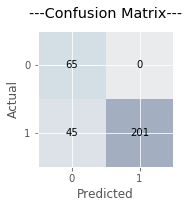

True Positive= 65 , True Negetive= 201 , False Positive= 45 , False Negetive= 0 

The accuracy is 85.5305466238 %
The recall is 100.0 %
The precision is 59.0909090909 %
The F1 Score is 74.2857142857 %


In [18]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
def stats(X_test, y_test, eps):
    predictions = np.array([multi_gauss(x) <= eps for x in X_test], dtype=bool)
    y_test = np.array(y_test, dtype=bool)
    CM=confusion_matrix(y_test, predictions)
    fig, ax = plot_confusion_matrix(conf_mat=CM)
    plt.title("---Confusion Matrix---")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    
    TP=CM[0,0]
    FN=CM[0,1]
    FP=CM[1,0]
    TN=CM[1,1]
    
    print("True Positive=",TP,", True Negetive=",TN,", False Positive=",FP,", False Negetive=",FN,"\n")
    
    accuracy=(TP+TN)/(TP+FP+FN+TN)
    recall=TP/(TP+FN)
    precision=TP/(TP+FP)
    f1=(2*precision*recall)/(precision+recall)
    
    print("The accuracy is "+str(accuracy*100) + " %")
    print("The recall is "+ str(recall*100) +" %")
    print("The precision is "+ str(precision*100) +" %")
    print("The F1 Score is "+ str(f1*100) +" %")

stats(X_valid, y_valid, eps)